Now that we know the basics of keras lets create an example: 

In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random

from IPython.display import display, HTML


display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
print(f" TensorFlow Version: {tf.__version__}")

 TensorFlow Version: 2.2.0


## 1.- Load the Fashion-MNIST dataset

In [48]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [136]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
10000 test set


In [50]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [51]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [52]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


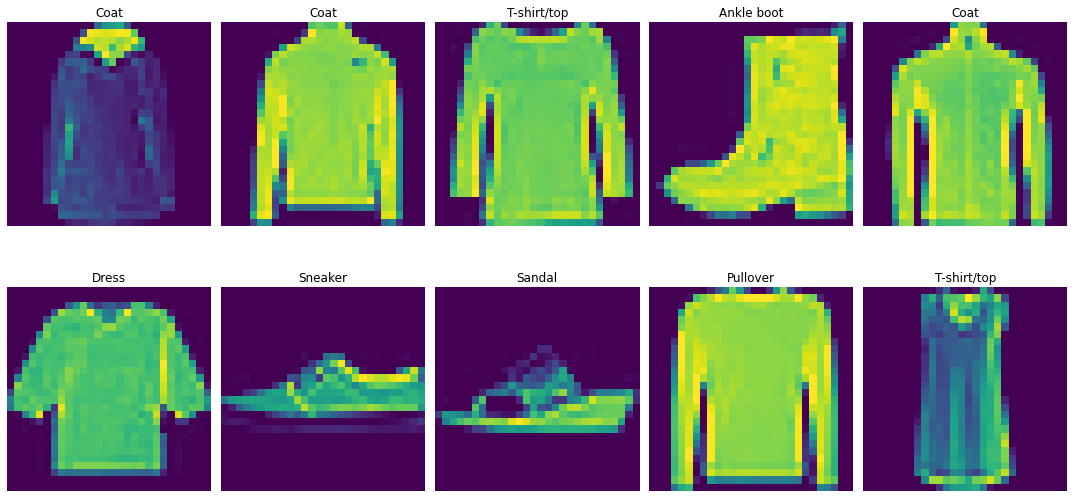

In [139]:
# settings
nrows, ncols = 2, 5  # array of sub-plots
figsize = [15, 8]     # figure size, inches


# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    example = random.randrange(0,x_train.shape[0]) # Select number of example
    y_class = np.argmax(y_train[example])          # Get Numerical class out of one-hote encoded vector
    label = fashion_mnist_labels[y_class]          # Get Word for label
    x_shaped = x_train[example].reshape(x_train.shape[1],x_train.shape[2]) # reshape x
    axi.imshow(x_shaped)                           # Plot x
    axi.axis('off')                                # Get rid of axis
    axi.set_title(f"{label}")                      # Set title


plt.tight_layout(True)
plt.show()

## 3.- Create the Model

In [53]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1568)             

## 4.- Compile Model

In [54]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## 5.- Fit Model

In [191]:
training = model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=4,
         validation_data=(x_valid, y_valid),
         verbose = 1,
         callbacks=[tf.keras.callbacks.EarlyStopping()]
         )

Epoch 1/4
860/860 [==============================] - 92s 107ms/step - loss: 0.2224 - accuracy: 0.9184 - val_loss: 0.2032 - val_accuracy: 0.9228
Epoch 2/4
860/860 [==============================] - 90s 104ms/step - loss: 0.2186 - accuracy: 0.9189 - val_loss: 0.2045 - val_accuracy: 0.9198


Notice that since we saved the Trainment of the model in a variable we can acces it's history

In [193]:
training.history

{'loss': [0.2224215418100357, 0.2185741811990738],
 'accuracy': [0.9184363484382629, 0.9188727140426636],
 'val_loss': [0.20323315262794495, 0.20447351038455963],
 'val_accuracy': [0.9228000044822693, 0.9197999835014343]}

We can use this information to create plots

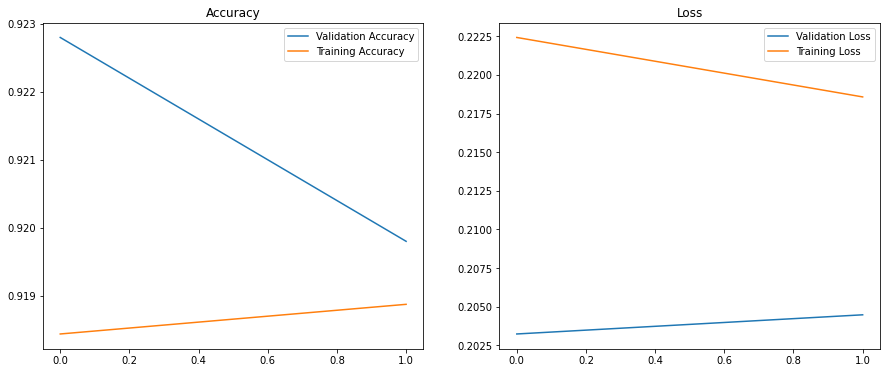

In [206]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
### Plot accuracy ###
ax[0].set_title("Accuracy")
ax[0].plot(training.history["val_accuracy"], label = "Validation Accuracy")
ax[0].plot(training.history["accuracy"],     label ="Training Accuracy")
ax[0].legend()

### Plot loss ###
ax[1].set_title("Loss")
ax[1].plot(training.history["val_loss"], label ="Validation Loss")
ax[1].plot(training.history["loss"],     label ="Training Loss")
ax[1].legend()

plt.show()

We can use the method evaluate() to check the test set. evaluate() will return the loss plus the metrics we defined

In [62]:
loss_test, accuracy_test = model.evaluate(x_test ,y_test)
print("loss in test set: {loss_test}, Accuracy in test set: {acuraccy_test}")

313/313 [==============================] - 5s 15ms/step - loss: 0.2252 - accuracy: 0.9158


In [69]:
y_hat = model.predict(x_test)

In [82]:
# Notice that: tensorflow expect a tensro of shape n,28,28,1
# when we slice one example we loose  n so we have to add an axis to use 
# mode.predic() for one example
print(x_test.shape)
print(x_test[1].shape)

(10000, 28, 28, 1)
(28, 28, 1)


In [83]:
y_predict_1 = model.predict(x_test[1][np.newaxis,...])

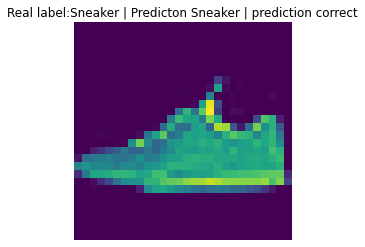

In [178]:
def plot_prediction(x,y):
    example = random.randrange(0,x.shape[0])                 # Select number of example

    y_predict_1 = model.predict(x[example][np.newaxis,...])  # Make perdiction 
    y_predict_1  = np.argmax(y_predict_1)                    #  Get Numerical class out of one-hote encoded prediction
    y_class_true = np.argmax(y[example])                     # Get Numerical class out of one-hote encoded real label
    label_predicted = fashion_mnist_labels[y_predict_1]      # Get Word for prediction label
    label_true = fashion_mnist_labels[y_class_true]          # Get Word for real label
    x_shaped = x[example].reshape(x.shape[1],x.shape[2])     # Reshape x into an (pixle,pixel) Matrix
    plt.imshow(x_shaped)                                     # Plot Matrix
    plt.axis('off')
    if label_true == label_predicted:                        # Check if labels are correct
        status ="prediction correct"                         # If labels are equal, labels are correct
    else:
        status ="prediction incorrect"                       # Else they are incorrect

    # Set title 
    plt.title(f"Real label:{label_true} | Predicton {label_predicted} | {status}")
    plt.show()

plot_prediction(x_test,y_test)